## Optimal Investment Strategy for the S&P500 ?

Some have hypothesized that one can beat the average returns of the S&P500 by investing only at the beginning of the month, when companies are depositing their employees pension funds. We will test this by using historical data and calculating the returns one would achieve by buying at the opening of the first day of each month and selling by the 7th.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# first, read in the data: https://finance.yahoo.com/quote/SPY/history?p=SPY
spydf = pd.read_csv("SPY.csv")
spydf.Date = pd.to_datetime(spydf.Date)
spydf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.397583,480500
1,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.451406,201300
2,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.720430,529400
3,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.828054,531500
4,1993-02-05,44.96875,45.06250,44.71875,44.96875,25.810110,492100


In [87]:
# The main loop
gains = [] # This list will store the percentage gains over first week of each month

buy = 0
sell = 0
for ind in spydf.index:
    # Try putting in a stop loss and see if that makes a difference
    sl = -0.1
    if buy > 0:
        if ((spydf.Low[ind] - buy)/buy) <= sl:
            #print(buy,spydf.Low[ind],(spydf.Low[ind] - buy)/buy)
            gains.append(sl)
            buy = 0
    
    if buy == 0 and spydf.Date.dt.day[ind] == 1:
        buy = spydf.Open[ind]
        sell = 0
    if buy == 0 and spydf.Date.dt.day[ind] == 2:
        buy = spydf.Open[ind]
        sell = 0
    if buy == 0 and spydf.Date.dt.day[ind] == 3:
        buy = spydf.Open[ind]
        sell = 0       
    if buy == 0 and spydf.Date.dt.day[ind] == 4:
        buy = spydf.Open[ind]
        sell = 0
        
    if sell == 0 and spydf.Date.dt.day[ind] == 7 and buy != 0:
        sell = spydf.Close[ind]
        gains.append((sell - buy)/buy)
        buy = 0
    if sell == 0 and spydf.Date.dt.day[ind] == 8 and buy != 0:
        sell = spydf.Close[ind]
        gains.append((sell - buy)/buy)
        buy = 0       
    if sell == 0 and spydf.Date.dt.day[ind] == 9 and buy != 0:
        sell = spydf.Close[ind]
        gains.append((sell - buy)/buy)
        buy = 0

In [89]:
gain = 1.

for i in gains:
    gain = gain*(1. + i)
    
print("If one were to only invest at the beginning of each month, they would have made: %",100.*gain)

print(min(gains))

If one were to only invest at the beginning of each month, they would have made: % 259.13893806598384
-0.1


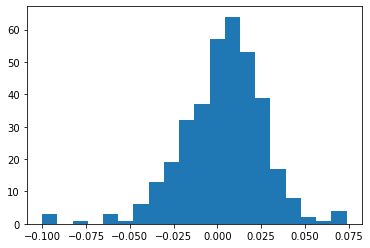

Minimum gain: % -10.0 , maximum gain % 7.377342554427282


In [90]:
plt.hist(gains, bins=20)
plt.show()

print("Minimum gain: %",100.*min(gains),", maximum gain %",100.*max(gains))

In [91]:
diff = (spydf.Close.iloc[-1] - spydf.Open.iloc[0])/spydf.Open.iloc[0]

print("If one had invested for the full duration, their returns would be %",100.*diff)

If one had invested for the full duration, their returns would be % 800.3667491115848
